# attenzione 
ho capito perche mi da l errore di non connettivitá. perche gli artworks non condividono utenti e quindi sono separati.(credo)

In [1]:
from networkx.algorithms import bipartite
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output/network.csv',delimiter=',',names=['art','user','weight'])
df

,art,user,weight
(0,0),505080,77
(0,0),60309,2
(0,0),100556,2
(0,0),138173,186
(0,0),84636,3
...,...,...,...
(19,19),479743,6
(19,19),204544,1
(19,19),347242,1
(19,19),412726,1


In [3]:
# test: questo qua sotto é un netowork bipartito connesso, ho 1 comp da 8 nodi
# a 1 
# b 2
# c 3
# d 4
# d 3
# c 2 
# b 1

G=nx.Graph()
fh=open('output/test.txt','r')

for line in fh.readlines():
    s=line.strip().split()
    #G.add_node(str(s[0]),bipartite=0)
    #G.add_node(int(s[1]),bipartite=1)
    G.add_edge(str(s[0]),int(s[1]))
fh.close()  
print([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])

top = nx.bipartite.sets(G)[1]
top

FileNotFoundError: [Errno 2] No such file or directory: 'output/test.txt'

In [5]:
def load_graph(MIN_TILES):
    G=nx.Graph()
    fh=open('output/network.csv','r')

    for line in fh.readlines():
        s=line.strip().split()
        if int(s[2]) >= MIN_TILES :
            G.add_edge(str(s[0]),int(s[1]),weight = int(s[2]))
    fh.close()  
    return G

In [5]:
def max_min_tiles(guess):
    # trova il massimo numero minimo di tiles messe da un utente per cui abbiamo una componente sola!
    G = load_graph(guess)
    n_comps = len([c for c in nx.connected_components(G)])
    MIN_TILES = guess
    while n_comps > 1 :
        G  = load_graph(MIN_TILES)
        n_comps = len([c for c in nx.connected_components(G)])        
        MIN_TILES = MIN_TILES -  1

    return G, MIN_TILES

In [29]:
G,MIN_TILES = max_min_tiles(60)
MIN_TILES

39

In [7]:
MIN_TILES = 1

In [8]:
G=nx.Graph()
fh=open('output/network.csv','r')


for line in fh.readlines():
    s=line.strip().split(',')
    #G.add_node(str(s[0]),bipartite=0)
    #G.add_node(int(s[1]),bipartite=1)
    if int(s[2]) >= MIN_TILES:
        G.add_edge(str(s[0]),int(s[1]),weight = int(s[2]))
fh.close()  

ValueError: invalid literal for int() with base 10: ' 0)'

In [6]:
labels = nx.get_edge_attributes(G,'weight')
l = []
for key in labels:
    l.append(key)

In [7]:
len(labels)

3897

Counter({2: 274, 3: 252, 5: 238, 4: 224, 6: 195, 9: 162, 7: 153, 8: 153, 15: 138, 13: 130, 12: 121, 10: 120, 16: 119, 17: 112, 14: 112, 11: 107, 18: 94, 19: 92, 20: 56, 21: 50, 22: 41, 24: 37, 23: 26, 30: 19, 48: 18, 42: 18, 50: 17, 26: 17, 27: 17, 44: 15, 54: 15, 64: 15, 25: 15, 45: 14, 51: 14, 39: 14, 35: 14, 29: 14, 52: 13, 40: 13, 62: 13, 56: 12, 55: 12, 49: 12, 58: 12, 61: 11, 37: 11, 65: 11, 32: 11, 31: 11, 89: 11, 75: 10, 46: 10, 77: 10, 59: 10, 69: 10, 103: 10, 98: 10, 41: 9, 28: 9, 43: 9, 38: 9, 67: 9, 94: 9, 93: 9, 66: 8, 100: 8, 88: 8, 47: 7, 86: 7, 101: 7, 36: 7, 82: 7, 70: 7, 99: 7, 53: 7, 68: 7, 87: 7, 90: 7, 83: 7, 96: 6, 76: 6, 34: 6, 92: 6, 97: 6, 91: 6, 112: 6, 104: 6, 111: 6, 102: 6, 84: 6, 128: 6, 95: 6, 72: 5, 85: 5, 71: 5, 105: 5, 63: 5, 74: 5, 124: 5, 109: 5, 107: 5, 122: 5, 60: 4, 33: 4, 117: 4, 110: 4, 133: 4, 116: 4, 106: 4, 120: 4, 108: 4, 80: 3, 119: 3, 121: 3, 125: 3, 113: 3, 115: 3, 136: 3, 127: 3, 130: 3, 255: 3, 160: 2, 57: 2, 226: 2, 139: 2, 129: 2, 123

(1.0, 10000.0, 1e-05, 1.0)

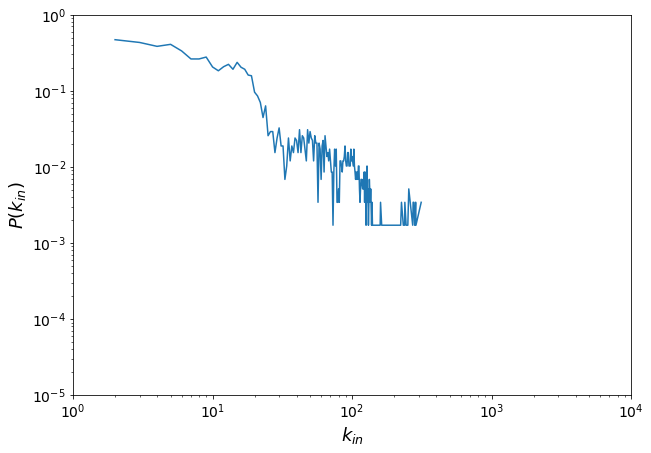

In [8]:
from collections import Counter 
import matplotlib.pyplot as plt

indeg=labels.values()
degin_distri=Counter(indeg)
print(degin_distri)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(G))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [9]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[584]

In [13]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [ ]:
S[0].edges

In [10]:
nx.is_connected(G)

True

In [11]:
nx.is_bipartite(G)

True

In [28]:
top = nx.bipartite.sets(G)[1]
len(top)

503

In [29]:
B = bipartite.projected_graph(G,top, multigraph=False)

In [30]:
l = B.degree()


In [31]:
len(B.edges)

96296

In [16]:
fh = open('./output/users_network' + str(MIN_TILES) + '.txt', "wb")
nx.write_edgelist(B, fh,delimiter= ' ',data = False)

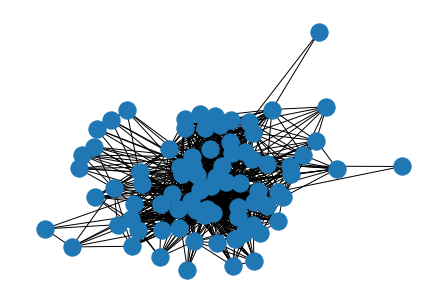

In [26]:
nx.draw(B)

Counter({23: 6, 18: 5, 19: 5, 29: 5, 25: 5, 16: 4, 15: 4, 28: 4, 8: 4, 49: 3, 12: 3, 39: 3, 6: 3, 37: 2, 20: 2, 32: 2, 50: 2, 7: 2, 2: 2, 36: 2, 11: 2, 17: 1, 22: 1, 4: 1, 27: 1, 31: 1, 44: 1, 13: 1, 59: 1, 33: 1, 10: 1, 65: 1})


(1.0, 10000.0, 1e-05, 1.0)

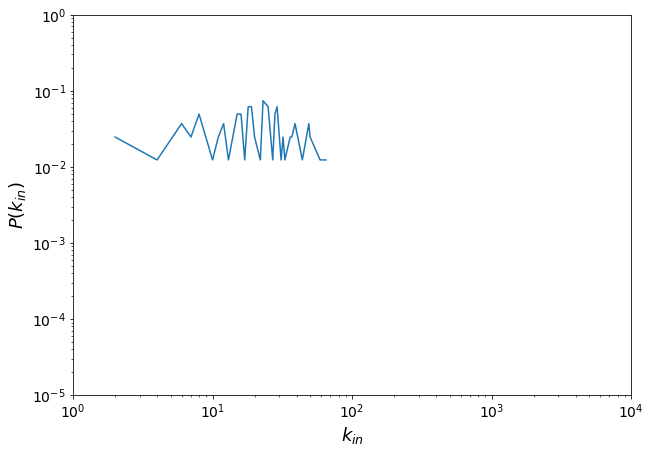

In [27]:
from collections import Counter 
import matplotlib.pyplot as plt

indeg=dict(B.degree()).values()
degin_distri=Counter(indeg)
print(degin_distri)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(B))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [ ]:
nx.number_connected_components(B)

1

In [18]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [19]:
partition = community_louvain.best_partition(B)


In [20]:
# draw the graph
pos = nx.spring_layout(B)
# color the nodes according to their partition


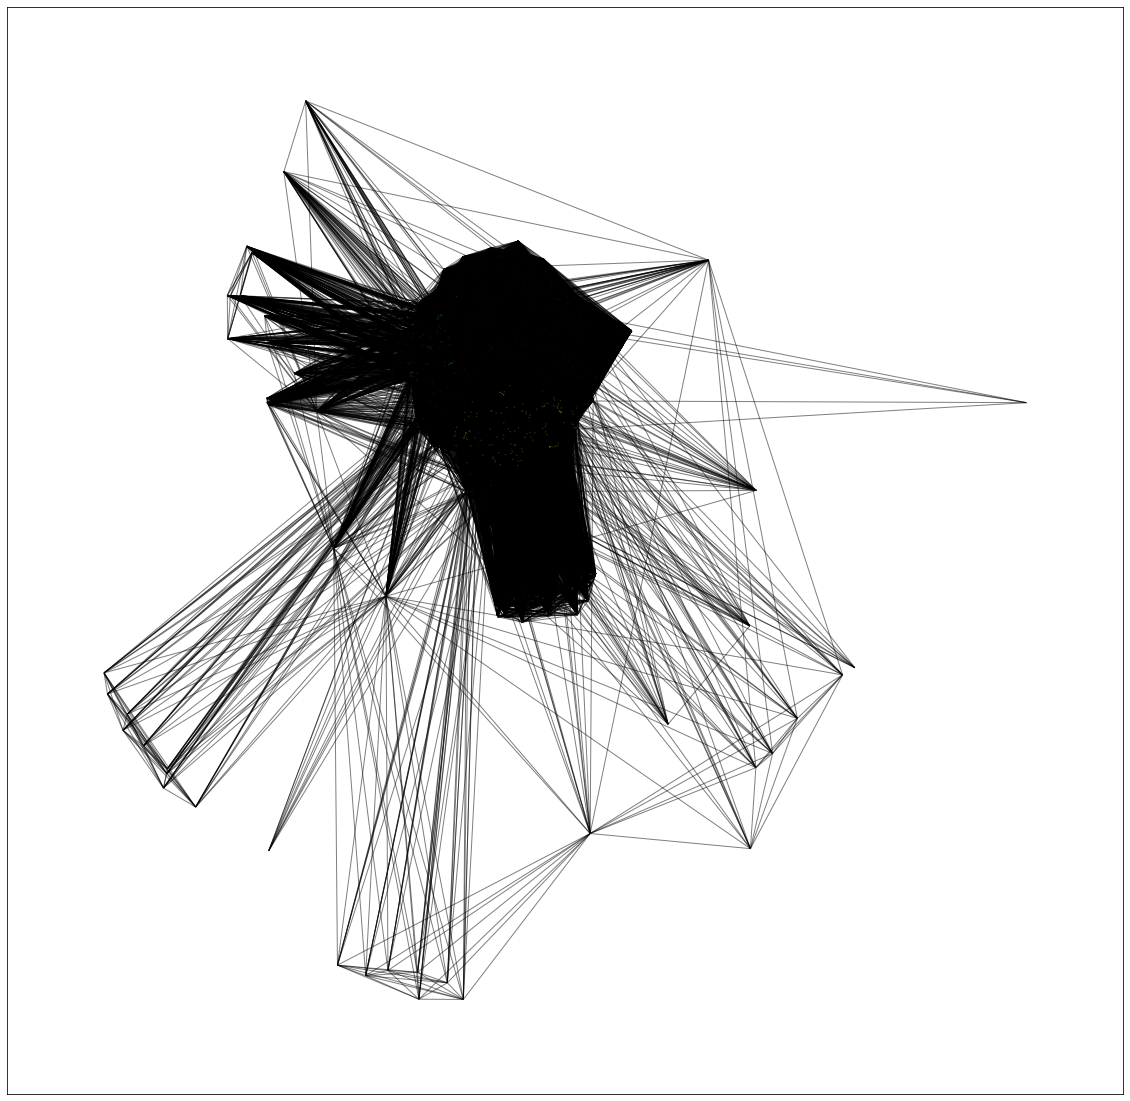

In [21]:
plt.figure(figsize=(20,20)) 
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(B, pos, partition.keys(), node_size=0.01,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(B, pos, alpha=0.5)
plt.show()